In [79]:
import pandas as pd
import numpy as np

import pickle
from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

In [80]:
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [81]:
%config InlineBackend.figure_format = 'retina'

In [82]:
df0 = pd.read_csv("datasets/creditscoring/datos.csv")
df0.shape

(284807, 36)

In [83]:
df0.head()

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud
0,99899e9e02c4b41fc442744220e6fa12f8d36b26f70027...,155270.0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.051705,0.700084,-1.185263,-0.183050,1.051029,0.267423,-0.220569,1.358207,-0.321922,-1.121246,0.852400,-0.635935,-0.445327,-0.251412,-0.989219,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0
1,d678605da2ed45d14c95228b2e6a0daa1c635c7c5d3f7c...,46054.0,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.292049,0.624199,0.327219,-0.032708,-0.372193,1.440826,-0.049183,-0.595081,0.376050,-0.518996,-1.245331,2.034140,-0.073293,-0.439827,-0.863551,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0
2,5f178ebbecf592c3ea98b5b26ff3547f8a40e88aa428d5...,167866.0,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.112687,-0.307426,1.595186,1.385215,1.068869,1.133506,-2.619782,0.277352,-0.512077,-0.713025,-1.201109,0.561721,-0.351699,0.362076,-1.215083,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0
3,455543a8012484e430efd18300186319bf8da376811333...,163539.0,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.016800,0.861519,-0.891606,1.139910,1.179129,-0.795164,-1.056983,-0.142009,-0.026496,1.408220,0.446607,-0.791305,-0.159512,-0.300838,-0.787018,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0
4,d8637ef4c5c833fee92149b5b8ef2fad601196be9b7c89...,153872.0,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,-0.206405,0.367224,0.721541,-0.713888,0.496167,0.629590,0.325217,-0.947716,0.513088,0.854643,-0.175665,1.449330,0.141885,-0.854064,-0.347373,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0


In [84]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  284807 non-null  object 
 1   timestamp       284807 non-null  float64
 2   amount          284807 non-null  float64
 3   variable_01     284807 non-null  float64
 4   variable_02     284807 non-null  float64
 5   variable_03     284807 non-null  float64
 6   variable_04     284807 non-null  float64
 7   variable_05     284807 non-null  float64
 8   variable_06     284807 non-null  float64
 9   variable_07     284807 non-null  float64
 10  variable_08     284807 non-null  float64
 11  variable_09     284807 non-null  float64
 12  variable_10     284807 non-null  float64
 13  variable_11     284807 non-null  float64
 14  variable_12     284807 non-null  float64
 15  variable_13     284807 non-null  float64
 16  variable_14     284807 non-null  float64
 17  variable_1

In [85]:
df0['datetime'] = df0['timestamp'].map(lambda x: datetime.fromtimestamp(x))
df0['hora'] = df0['datetime'].map(lambda x: x.hour)

In [86]:
df0.head()

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud,datetime,hora
0,99899e9e02c4b41fc442744220e6fa12f8d36b26f70027...,155270.0,12.00,-0.071330,-0.032900,0.109989,0.339889,-0.626131,-0.116853,1.220826,0.394041,0.051705,0.700084,-1.185263,-0.183050,1.051029,0.267423,-0.220569,1.358207,-0.321922,-1.121246,0.852400,-0.635935,-0.445327,-0.251412,-0.989219,-0.168169,-1.054944,-1.603176,-0.616640,2.283078,0.373964,1.576543,-0.941557,-0.105280,0,1970-01-02 13:07:50,13
1,d678605da2ed45d14c95228b2e6a0daa1c635c7c5d3f7c...,46054.0,208.89,0.057858,0.003669,0.076745,0.392782,0.458835,-0.279094,0.435257,0.230350,0.292049,0.624199,0.327219,-0.032708,-0.372193,1.440826,-0.049183,-0.595081,0.376050,-0.518996,-1.245331,2.034140,-0.073293,-0.439827,-0.863551,-1.606923,-1.100937,0.597263,-1.228029,0.875399,0.260934,-0.558290,0.763729,0.011740,0,1970-01-01 06:47:34,6
2,5f178ebbecf592c3ea98b5b26ff3547f8a40e88aa428d5...,167866.0,1.00,-0.002449,0.019520,-0.038565,0.400659,-1.214922,-0.177434,0.303247,0.030461,-0.112687,-0.307426,1.595186,1.385215,1.068869,1.133506,-2.619782,0.277352,-0.512077,-0.713025,-1.201109,0.561721,-0.351699,0.362076,-1.215083,1.044934,0.533274,-2.802382,0.570268,2.121604,-0.131120,1.603304,-0.032323,0.062465,0,1970-01-02 16:37:46,16
3,455543a8012484e430efd18300186319bf8da376811333...,163539.0,15.00,-0.039202,-0.031762,-0.328682,-0.045094,0.606368,0.204822,0.014322,0.013439,0.016800,0.861519,-0.891606,1.139910,1.179129,-0.795164,-1.056983,-0.142009,-0.026496,1.408220,0.446607,-0.791305,-0.159512,-0.300838,-0.787018,0.020468,-0.853713,-1.915028,-0.478400,2.161957,-1.117518,1.768693,-0.517470,-0.101639,0,1970-01-02 15:25:39,15
4,d8637ef4c5c833fee92149b5b8ef2fad601196be9b7c89...,153872.0,0.01,-0.058206,-0.051926,0.653525,-0.387901,0.806301,0.227390,0.676840,0.209482,-0.206405,0.367224,0.721541,-0.713888,0.496167,0.629590,0.325217,-0.947716,0.513088,0.854643,-0.175665,1.449330,0.141885,-0.854064,-0.347373,-0.750013,-0.914675,-0.595874,-0.705751,2.026529,2.221984,0.744251,-0.768323,-0.166163,0,1970-01-02 12:44:32,12


In [87]:
df0.describe(percentiles=[.01,.25,.5,.75,.99])

,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud,datetime,hora
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807,284807.000000
mean,94813.859575,88.349619,-1.247286e-16,-3.675372e-16,1.687909e-15,5.135092e-16,4.471744e-15,2.636528e-16,-3.504227e-16,1.630616e-16,6.451110e-16,1.037596e-15,9.705855e-16,-3.752462e-16,1.434753e-15,4.888154e-15,1.210987e-15,8.246260e-16,-1.247336e-15,1.698974e-15,2.236932e-15,-2.410771e-15,1.155601e-16,-5.633807e-16,1.496494e-15,1.006511e-15,2.094253e-15,-1.400967e-15,3.391960e-16,1.178654e-15,5.730107e-15,2.153430e-15,-1.612653e-15,-1.167676e-15,0.001727,1970-01-01 20:20:13.859575080,10.063331
min,0.000000,0.000000,-1.543008e+01,-2.256568e+01,-2.604551e+00,-1.029540e+01,-2.836627e+00,-4.480774e+01,-1.093314e+01,-3.483038e+01,-5.449772e+01,-7.213527e+00,-9.498746e+00,-2.516280e+01,-1.412985e+01,-4.498945e+00,-1.921433e+01,-5.791881e+00,-1.868371e+01,-4.797473e+00,-2.458826e+01,-1.343407e+01,-7.321672e+01,-4.355724e+01,-2.616051e+01,-1.137433e+02,-5.683171e+00,-4.832559e+01,-7.271573e+01,-5.640751e+01,-8.855472e+00,-2.119478e+01,-2.036771e+02,-7.221017e+01,0.000000,1969-12-31 18:00:00,0.000000
1%,2422.000000,0.120000,-8.762654e-01,-1.247746e+00,-1.009384e+00,-1.420859e+00,-1.657308e+00,-1.193417e+00,-1.654625e+00,-1.469679e+00,-1.568406e+00,-2.075516e+00,-2.147067e+00,-1.349962e+00,-2.381823e+00,-2.383923e+00,-2.799763e+00,-2.283101e+00,-3.063938e+00,-2.093086e+00,-2.092670e+00,-2.455288e+00,-4.033899e+00,-3.012847e+00,-2.124023e+00,-3.060396e+00,-3.122987e+00,-3.978377e+00,-4.960300e+00,-6.563199e+00,-3.431905e+00,-3.572735e+00,-1.156670e+01,-3.992787e+00,0.000000,1969-12-31 18:40:22,0.000000
25%,54201.500000,5.600000,-5.295979e-02,-7.083953e-02,-3.269839e-01,-3.171451e-01,-3.545861e-01,-1.618463e-01,-5.423504e-01,-2.283949e-01,-2.117214e-01,-4.562989e-01,-4.988498e-01,-4.837483e-01,-4.680368e-01,-5.828843e-01,-4.255740e-01,-6.485393e-01,-4.055715e-01,-7.624942e-01,-5.354257e-01,-6.430976e-01,-2.086297e-01,-5.540759e-01,-7.682956e-01,-6.915971e-01,-8.486401e-01,-8.903648e-01,-5.985499e-01,-9.203734e-01,-1.111745e+00,-7.020552e-01,-6.990693e-01,-2.266865e-01,0.000000,1970-01-01 09:03:21.500000,6.000000
50%,84692.000000,22.000000,1.124383e-02,1.342146e-03,-5.213911e-02,1.659350e-02,4.097606e-02,-1.119293e-02,6.781943e-03,-2.945017e-02,-6.248109e-02,3.734823e-03,-3.636312e-03,-6.567575e-02,6.641332e-02,4.807155e-02,5.060132e-02,-1.356806e-02,1.400326e-01,-3.275735e-02,-9.291738e-02,-5.142873e-02,2.235804e-02,4.010308e-02,-2.741871e-01,-5.433583e-02,-1.984653e-02,1.798463e-01,6.548556e-02,1.810880e-02,-1.772730e-01,9.961998e-02,1.484186e-01,4.294867e-03,0.000000,1970-01-01 17:31:32,10.000000
75%,139320.500000,77.165000,7.827995e-02,9.104512e-02,2.409522e-01,3.507156e-01,4.395266e-01,1.476421e-01,5.285536e-01,1.863772e-01,1.330408e-01,4.589494e-01,5.008067e-01,3.996750e-01,5.232963e-01,6.488208e-01,4.931498e-01,6.625050e-01,6.182380e-01,7.395934e-01,4.539234e-01,5.971390e-01,3.273459e-01,5.704361e-01,3.985649e-01,6.119264e-01,7.433413e-01,1.027196e+00,8.037239e-01,1.315642e+00,8.192374e-01,7.849445e-01,1.033295e+00,2.913444e-01,0.000000,1970-01-02 08:42:00.500000,14.000000
99%,170560.940000,1017.970000,5.411264e-01,9.313604e-01,1.158698

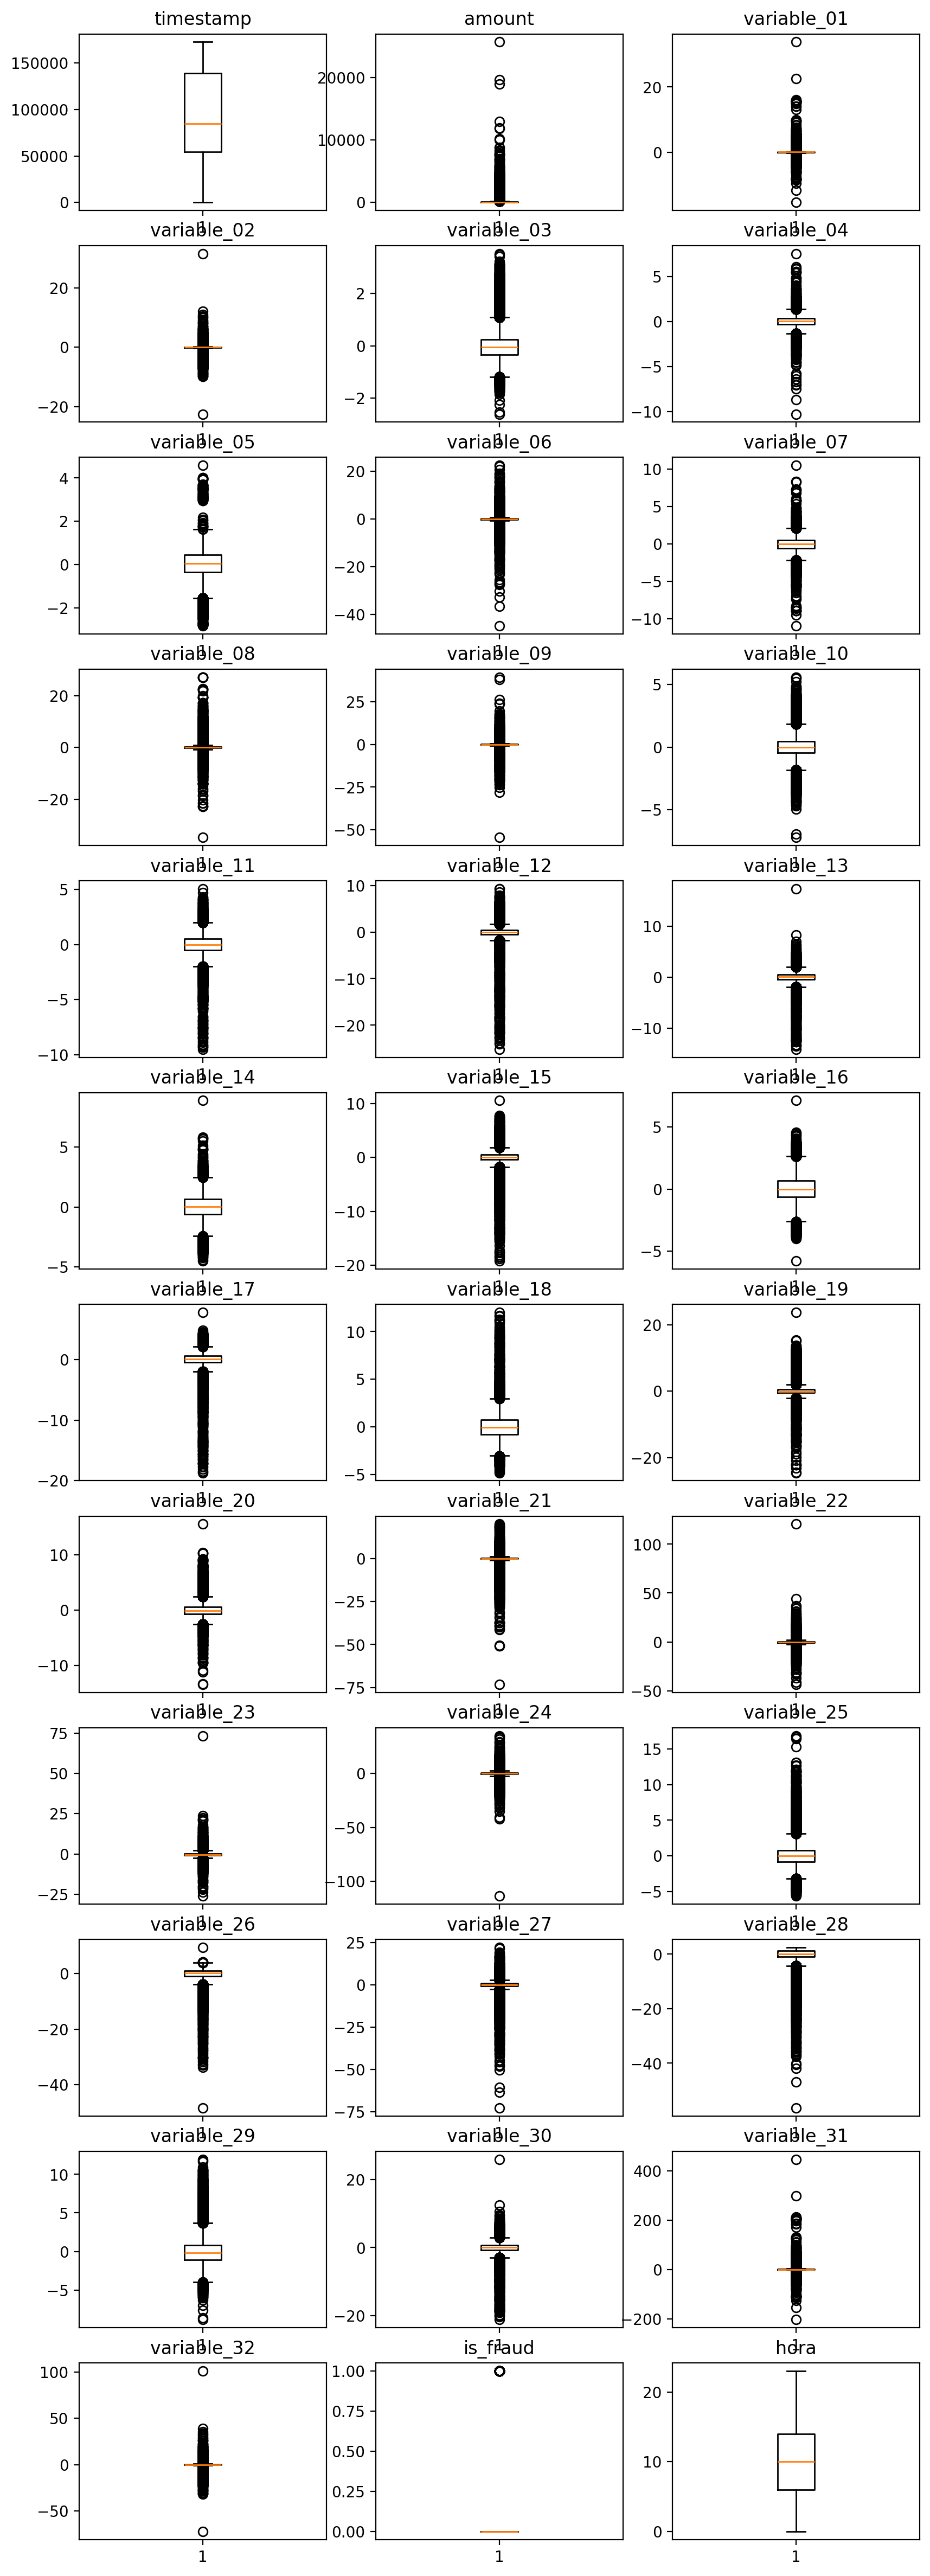

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = df0.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()

n_cols = 3
n_rows = 12

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(10, 30))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df0[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

In [89]:
df = df0[(df0['amount']<=700) & 
         (df0['variable_08']<=2) & 
         (df0['variable_31']<=7) & 
         (df0['variable_24']<=4) & 
         (df0['variable_32']<=3) & 
         (df0['variable_22']<=2) & 
         (df0['variable_09']<=2) & 
         (df0['variable_21']<=2) & 
         (df0['variable_29']<=4) & 
         (df0['is_fraud']!=1)]

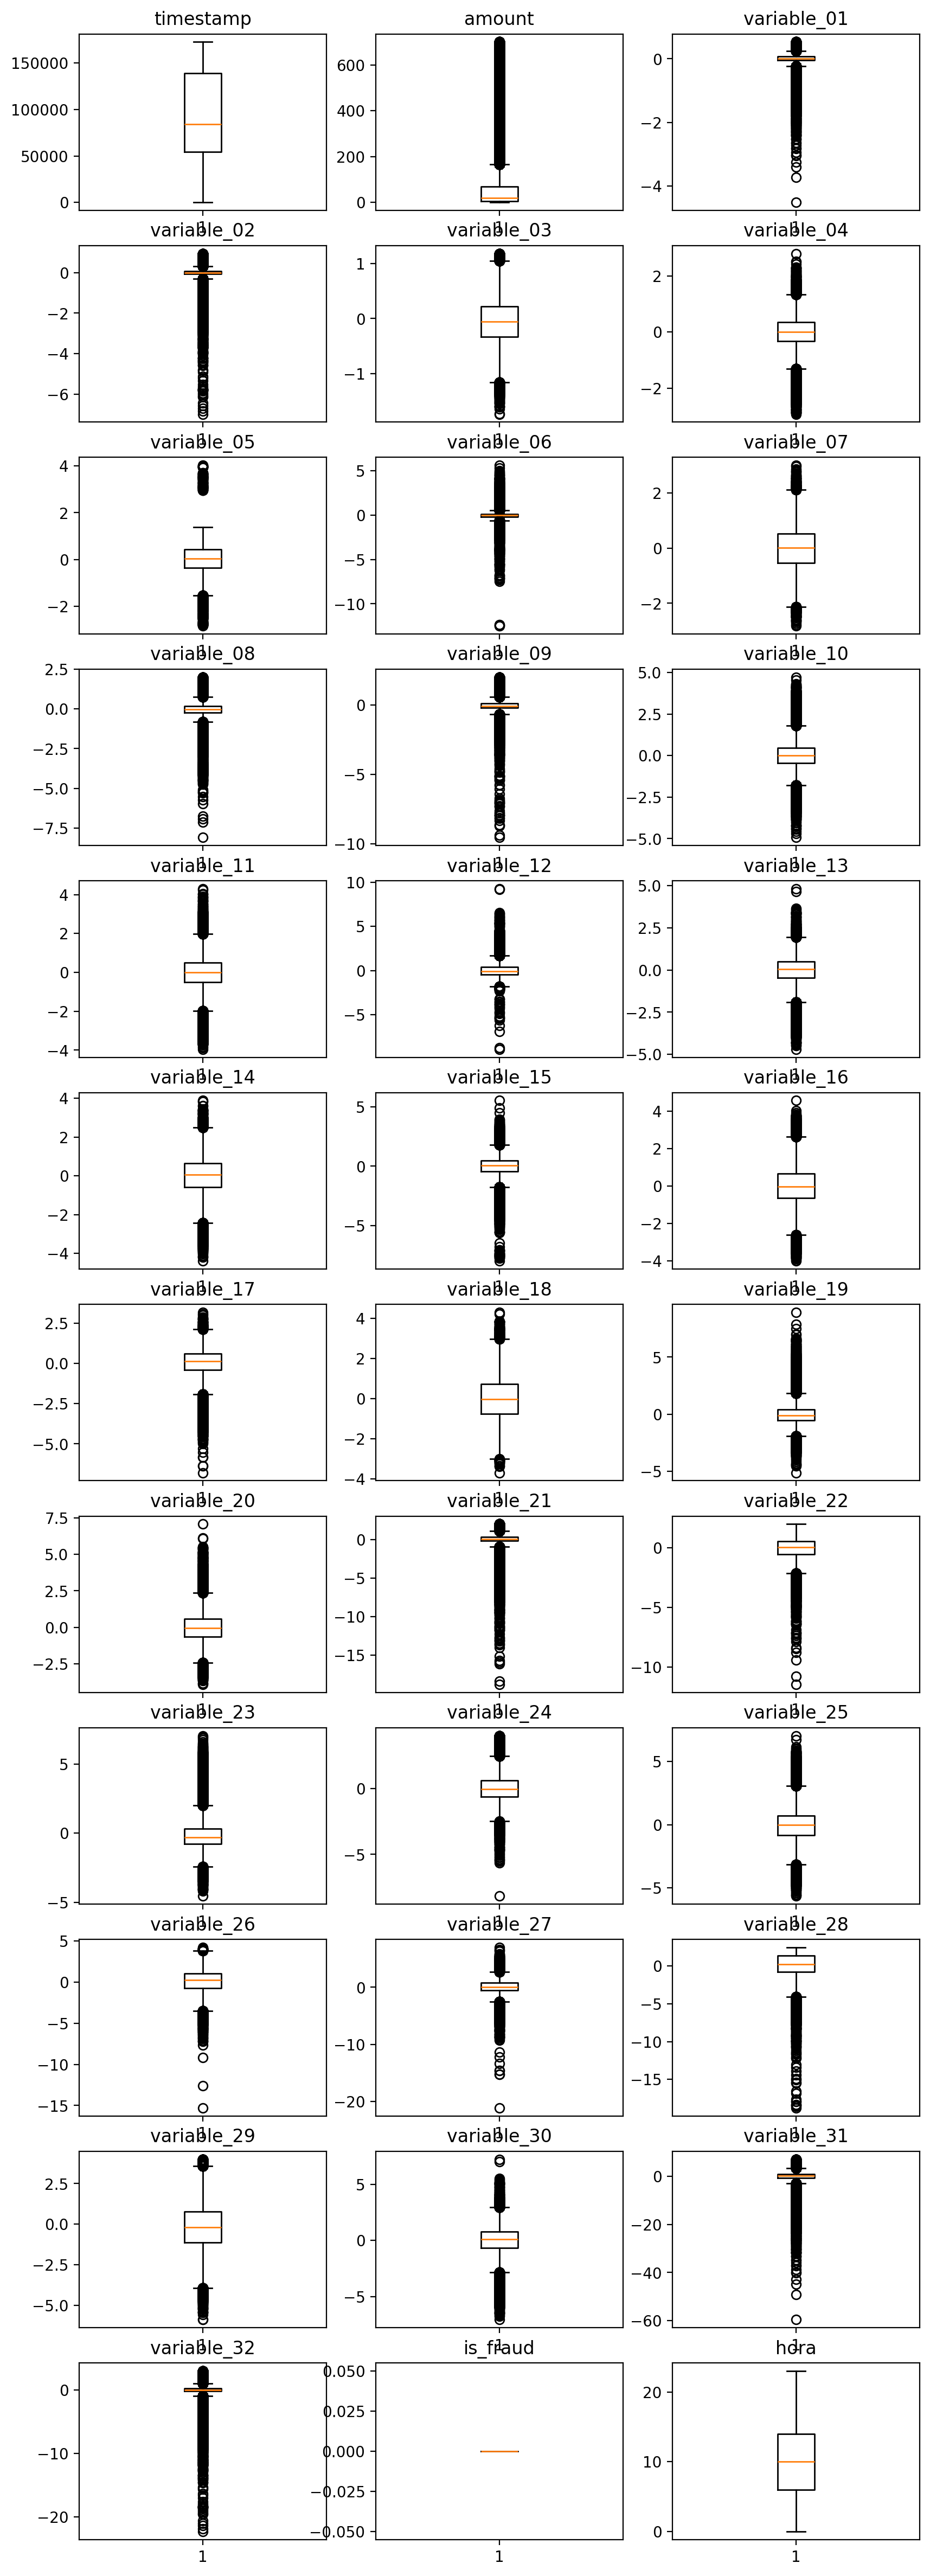

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = df.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()

n_cols = 3
n_rows = 12

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(10, 30))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

In [91]:
df['is_fraud'].value_counts()

is_fraud
0    263289
Name: count, dtype: int64

In [92]:
df = pd.concat([df,df0[df0['is_fraud']==1]]).reset_index(drop=True)

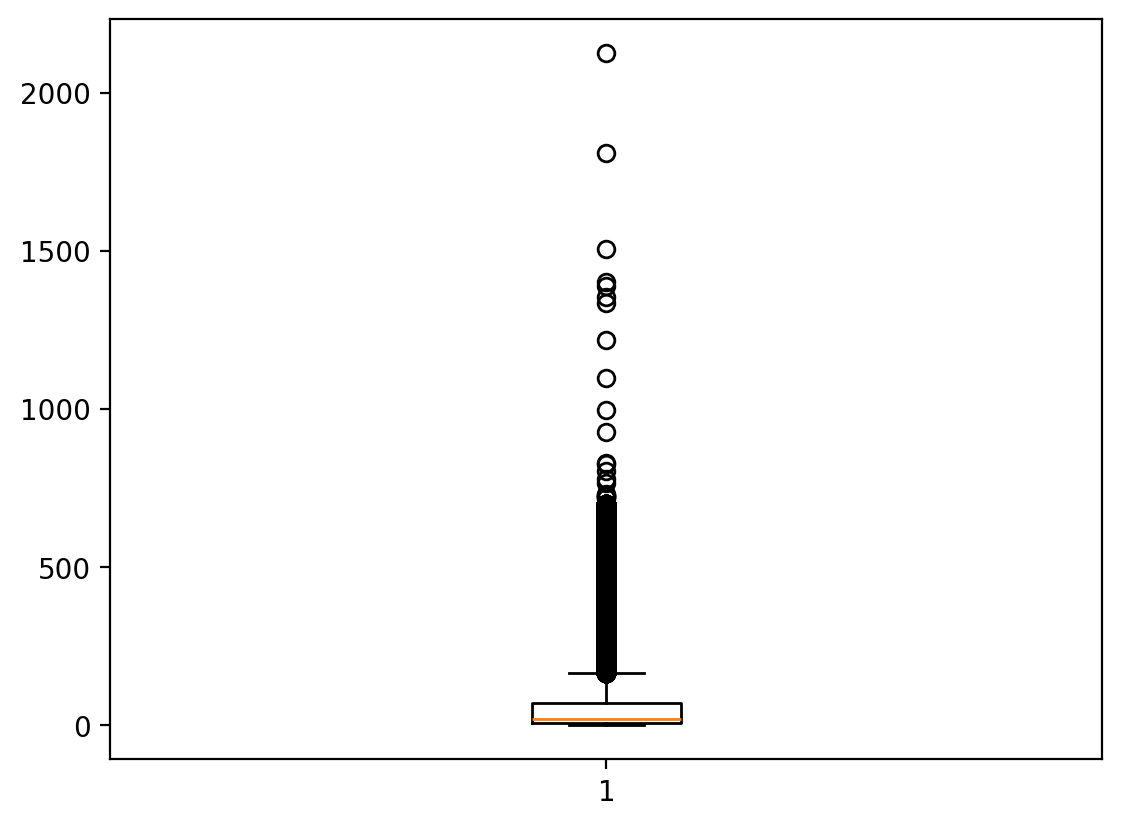

In [94]:
plt.boxplot(df['amount'])
plt.show()

In [95]:
df['amount'].describe(percentiles=[.01, .25, .5, .75, .99])

count    263781.000000
mean         60.312086
std          98.778488
min           0.000000
1%            0.120000
25%           5.350000
50%          20.000000
75%          69.350000
99%         501.000000
max        2125.870000
Name: amount, dtype: float64

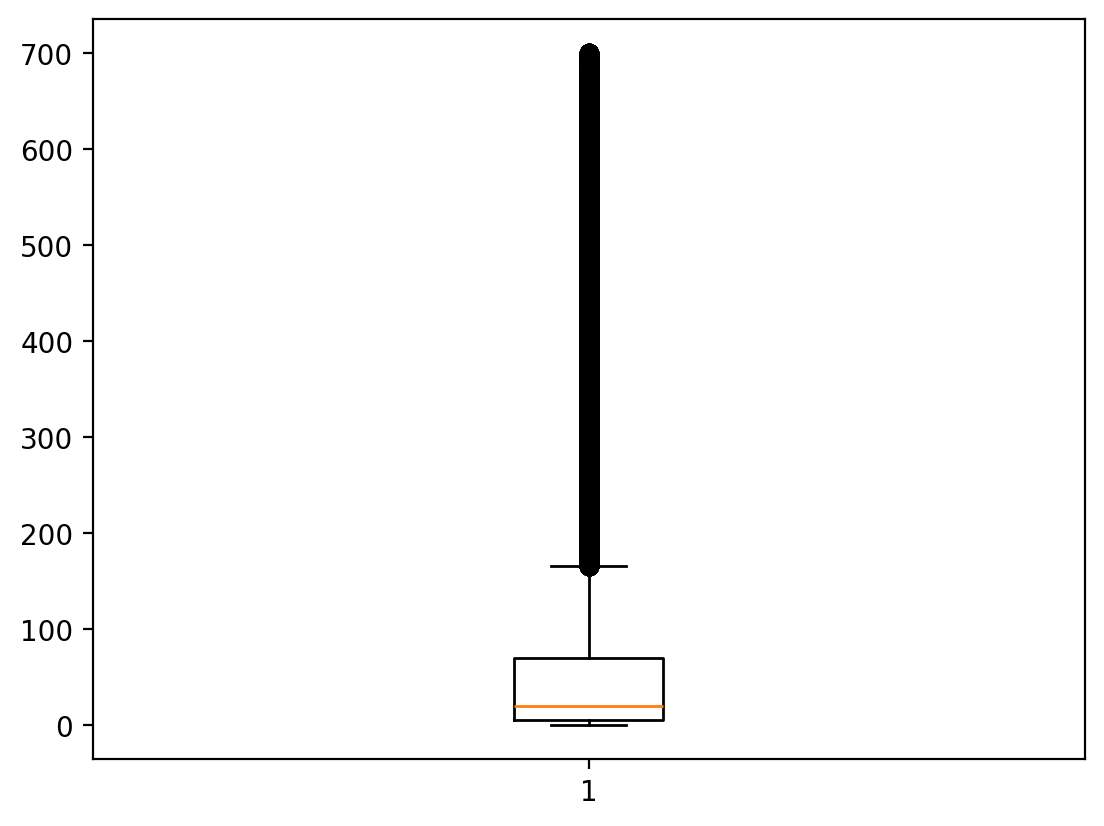

count    263758.00000
mean         60.22551
std          98.27988
min           0.00000
1%            0.12000
25%           5.35000
50%          20.00000
75%          69.34750
99%         500.00000
max         700.00000
Name: amount, dtype: float64

In [96]:
plt.boxplot(df[ df['amount'] <= 700 ]['amount'])
plt.show()

df[ df['amount'] <= 700 ]['amount'].describe(percentiles=[.01, .25, .5, .75, .99])

In [ ]:
df = df[df['amount'] <= 700].reset_index(drop=True)

In [100]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.998222
1    0.001778
Name: proportion, dtype: float64

In [101]:
print(len(df0))
print(len(df[(df['amount']<=1017.97) & (df['variable_31']<=7)]))
print(
    len(
        df0[(df0['amount']<=700) & 
        (df0['variable_08']<=2) & 
        (df0['variable_31']<=7) & 
        (df0['variable_24']<=4) & 
        (df0['variable_32']<=3) & 
        (df0['variable_22']<=2) & 
        (df0['is_fraud']!=1)]
        )
    )

284807
263694
268835


In [102]:
1-(len(df[(df['amount']<=1017.97) & (df['variable_31']<=7)])/len(df0))

0.07413090268146494

In [103]:
1 - ( len(
    df0[(df0['amount']<=700) & 
    (df0['variable_08']<=2) & 
    (df0['variable_31']<=7) & 
    (df0['variable_24']<=4) & 
    (df0['variable_32']<=3) & 
    (df0['variable_22']<=2) & 
    (df0['variable_09']<=2) & 
    (df0['variable_21']<=2) & 
    (df0['variable_29']<=4) & 
    (df0['is_fraud']!=1)]) / len(df0))

0.07555291829203636

In [104]:
df0['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [105]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.998222
1    0.001778
Name: proportion, dtype: float64

In [106]:
varc = ['hora', 'amount', 'variable_01', 'variable_02','variable_03', 'variable_04', 'variable_05', 'variable_06',
       'variable_07', 'variable_08', 'variable_09', 'variable_10','variable_11', 'variable_12', 'variable_13', 'variable_14',
       'variable_15', 'variable_16', 'variable_17', 'variable_18','variable_19', 'variable_20', 'variable_21', 'variable_22',
       'variable_23', 'variable_24', 'variable_25', 'variable_26','variable_27', 'variable_28', 'variable_29', 'variable_30',
       'variable_31', 'variable_32']
tgt  = ['is_fraud']

### Selección de variables

#### Variables continuas

In [107]:
lst,lst_iv = [],[]
for i,v in enumerate(varc):
    bestk   = 0
    best_iv = 0
    for k in range(2,10):
        aux         = df[[v,'is_fraud']].copy()
        aux[v]      = pd.cut(aux[v],bins=k,include_lowest=True).astype(str)
        aux['n']    = 1
        aux         = aux.pivot_table(index=v,columns='is_fraud',aggfunc='count')
        aux.columns = aux.columns.droplevel()
        aux.reset_index(inplace=True)
        for i in range(2):
            aux[i]/= aux[i].sum()
        aux['woe'] = np.log(aux[0]/aux[1])
        aux['iv']  = aux['woe']*(aux[0]-aux[1])
        if (aux['iv'].sum() > best_iv) & (~np.isinf(aux['iv'].sum())):
            best_iv = aux['iv'].sum()
            bestk   = k 
    aux = df[[v,'is_fraud']].copy()
    print("%s %.4f %d"%(v,best_iv,bestk))
    if .02 <= best_iv <= 1:
        lst.append(v)
        lst_iv.append((v,best_iv))
    aux[v]   = pd.cut(aux[v],bins=bestk,include_lowest=True).astype(str)
    aux['n'] = 1
    aux      = aux.pivot_table(index=v,columns='is_fraud',aggfunc='count')
    aux.columns = aux.columns.droplevel()
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/= aux[i].sum()
    aux['woe'] = np.log(aux[0]/aux[1])
    df[v] = pd.cut(df[v],bins=bestk,include_lowest=True).astype(str)
    df    = df.merge(aux[['woe',v]],how='inner',on=v)
    df.rename(columns={'woe':'W_%s'%v},inplace=True)

hora 0.3767 7
amount 0.0782 9
variable_01 1.2825 9
variable_02 1.8326 9
variable_03 0.0815 9
variable_04 0.2827 9
variable_05 0.1293 9
variable_06 0.3665 7
variable_07 0.1654 3
variable_08 0.1779 9
variable_09 0.5994 8
variable_10 0.9763 9
variable_11 2.2130 2
variable_12 6.1660 6
variable_13 5.0183 2
variable_14 0.0552 8
variable_15 5.6538 8
variable_16 0.0675 8
variable_17 4.9152 9
variable_18 4.9708 4
variable_19 4.8680 3
variable_20 2.5494 2
variable_21 0.2436 2
variable_22 3.2829 7
variable_23 2.1399 6
variable_24 2.1243 2
variable_25 4.7961 7
variable_26 4.3830 8
variable_27 2.4342 8
variable_28 1.9934 8
variable_29 0.0815 9
variable_30 5.0183 2
variable_31 1.2825 9
variable_32 1.8326 9


In [108]:
varw = ['W_'+i for i in lst]

# Borramos NaN de la variable objetivo
#df = df.dropna(axis=0,subset=['is_fraud']).reset_index(drop=True).copy()

In [109]:
varw

['W_hora',
 'W_amount',
 'W_variable_03',
 'W_variable_04',
 'W_variable_05',
 'W_variable_06',
 'W_variable_07',
 'W_variable_08',
 'W_variable_09',
 'W_variable_10',
 'W_variable_14',
 'W_variable_16',
 'W_variable_21',
 'W_variable_29']

In [110]:
lst_variables_modelo = varw+varc
lst_columnas_normales = varc

In [111]:
len(varw)

14

In [112]:
lst_iv

[('hora', np.float64(0.3766592181352462)),
 ('amount', np.float64(0.07817954992639951)),
 ('variable_03', np.float64(0.08150589735724037)),
 ('variable_04', np.float64(0.2826905335081579)),
 ('variable_05', np.float64(0.12929147400304064)),
 ('variable_06', np.float64(0.36652730077992945)),
 ('variable_07', np.float64(0.16542892986509328)),
 ('variable_08', np.float64(0.1778638158602447)),
 ('variable_09', np.float64(0.5993578613018955)),
 ('variable_10', np.float64(0.9763050092864426)),
 ('variable_14', np.float64(0.055227901894134596)),
 ('variable_16', np.float64(0.0674894916902274)),
 ('variable_21', np.float64(0.24360710370439925)),
 ('variable_29', np.float64(0.08150589735724037))]

#### Entrenamiento del modelo

In [113]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.998222
1    0.001778
Name: proportion, dtype: float64

In [114]:
df_uno   = df[df["is_fraud"]==1]
df_cero  = df[df["is_fraud"]==0].sample(len(df_uno)+(int(len(df_uno)/2))*3) #frac
df_ambos = pd.concat([df_uno,df_cero])
#del df_uno
#del df_cero

In [116]:
print("df_uno ", df_uno.shape)
print("df_cero", df_cero.shape)
print("df", df.shape)
print("df_ambos", df_ambos.shape)

df_ambos['is_fraud'].value_counts(normalize=True)

df_uno  (469, 72)
df_cero (1171, 72)
df (263758, 72)
df_ambos (1640, 72)


is_fraud
0    0.714024
1    0.285976
Name: proportion, dtype: float64

In [118]:
df_ambos.head()

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud,datetime,hora,W_hora,W_amount,W_variable_01,W_variable_02,W_variable_03,W_variable_04,W_variable_05,W_variable_06,W_variable_07,W_variable_08,W_variable_09,W_variable_10,W_variable_11,W_variable_12,W_variable_13,W_variable_14,W_variable_15,W_variable_16,W_variable_17,W_variable_18,W_variable_19,W_variable_20,W_variable_21,W_variable_22,W_variable_23,W_variable_24,W_variable_25,W_variable_26,W_variable_27,W_variable_28,W_variable_29,W_variable_30,W_variable_31,W_variable_32
263289,70ff5fa565f36cf0db98ef366c68689e2e2c4b76221e7d...,150139.0,"(233.333, 311.111]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.24, 0.258]","(0.682, 1.385]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-4.398, -1.822]","(0.712, 1.841]","(-2.602, 4.296]","(-7.955, -2.219]","(-4.657, 4.816]","(-0.309, 0.739]","(-3.762, -0.671]","(-0.792, 0.28]","(-4.111, -1.682]","(-3.701, 0.241]","(-13.415, -2.242]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(-1.925, 0.315]","(-5.505, 11.095]","(-0.598, 1.944]","(-9.047, -4.635]","(-4.938, 0.461]","(-9.923, -5.797]","(-0.815, 0.877]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",1,1970-01-02 11:42:19,"(9.857, 13.143]",0.127009,-0.410317,0.521623,0.827556,0.087899,-0.510764,0.189183,0.172245,0.039094,0.118978,-2.968047,-0.555345,0.492478,-8.090814,0.533828,0.049815,0.264171,0.254711,-1.150455,2.041538,-5.230786,0.433191,0.043436,0.805614,0.355653,0.237088,1.215972,-6.539659,1.799007,-4.295547,0.087899,0.533828,0.521623,0.827556
263290,d4c08ffe5bf53cde213abf9debb6c094c857bea4933d7a...,93879.0,"(-0.701, 77.778]","(-1.017, -0.318]","(-2.832, -1.725]","(-0.24, 0.258]","(-1.427, -0.724]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-9.514, -2.602]","(-19.427, -13.691]","(-14.149999999999999, -4.657]","(-3.451, -2.404]","(-13.033, -9.943]","(0.28, 1.352]","(-16.255, -13.826]","(4.167, 8.093]","(-13.415, -2.242]","(-13.456, -3.173]","(-10.519, 20.007]","(-16.364, -9.565]","(-4.166, -1.925]","(-22.14, -5.505]","(9.572, 12.115]","(-22.281, -17.869]","(5.86, 11.259]","(-14.049, -9.923]","(-0.815, 0.877]","(-21.224, -6.985]","(-13.425, -4.197]","(-9.064, -5.519]",1,1970-01-01 20:04:39,"(19.714, 23.0]",-1.677988,0.131569,-1.275780,-2.955475,0.087899,-0.232671,0.189183,0.172245,0.039094,0.118978,0.304766,0.722401,-5.210170,NaN,-11.598263,-1.066851,NaN,0.029105,NaN,-10.773056,-5.230786,-6.821230,0.043436,-9.748131,-3.659056,-9.826912,NaN,NaN,-8.879850,-6.538044,0.087899,-11.598263,-1.275780,-2.955475
263291,e9b6883e66a35926e0da6c169a5db6bd34c2d73bf4346d...,102676.0,"(77.778, 155.556]","(-1.017, -0.318]","(-0.617, 0.491]","(0.258, 0.755]","(-0.724, -0.021]","(-0.55, 0.212]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(0.712, 1.841]","(-2.602, 4.296]","(-13.691, -7.955]","(-14.149999999999999, -4.657]","(-0.309, 0.739]","(-9.943, -6.852]","(2.425, 3.497]","(-11.397, -8.968]","(4.167, 8.093]","(-13.415, -2.242]","(-13.456, -3.173]","(-10.519, 20.007]","(-9.565, -2.767]","(-1.925, 0.315]","(-5.505, 11.095]","(7.03, 9.572]","(-13.458, -9.047]","(0.461, 5.86]","(-5.797, -1.671]","(0.877, 2.568]","(-21.224, -6.985]","(-13.425, -4.197]","(-1.974, 1.571]",1,1970-01-01 22:31:16,"(19.714, 23.0]",-1.677988,-0.322433,-1.275780,0.827556,-0.529505,0.334912,-0.118222,0.172245,0.039094,0.118978,0.304766,-0.555345,0.492478,-10.252378,-11.598263,0.049815,-7.724998,0.309144,NaN,-10.773056,-5.230786,-6.821230,0.043436,-4.822008,0.355653,0.237088,-10.473540,-9.398458,-0.662844,-1.326222,-0.529505,-11.598263

In [121]:
df_ambos[varw].sample(5)

,W_hora,W_amount,W_variable_03,W_variable_04,W_variable_05,W_variable_06,W_variable_07,W_variable_08,W_variable_09,W_variable_10,W_variable_14,W_variable_16,W_variable_21,W_variable_29
127801,-1.677988,0.131569,-0.529505,0.334912,-0.387349,0.172245,0.039094,0.118978,0.304766,0.375989,0.139367,0.029105,0.043436,-0.529505
263373,-1.677988,0.131569,-0.529505,-1.759136,-0.387349,0.172245,0.039094,0.118978,-2.091393,-3.478786,0.038538,0.029105,0.043436,-0.529505
2251,0.127009,-0.322433,0.087899,0.049503,-0.387349,0.172245,0.039094,0.118978,0.304766,0.722401,0.049815,0.029105,0.043436,0.087899
34389,0.658523,0.131569,0.087899,0.334912,1.213186,0.172245,0.039094,0.118978,0.304766,0.722401,0.049815,0.029105,0.043436,0.087899
263422,0.127009,0.131569,0.265668,0.049503,-0.118222,-1.907795,0.039094,0.118978,0.304766,0.722401,-0.423681,-0.256938,0.043436,0.265668


Entrenamiento del modelo

In [122]:
##*** Entrenamiento     
X                           = df_ambos[varw].dropna(axis=1).copy()
y                           = df_ambos['is_fraud'].copy()


Xt, Xv, yt, yv              = train_test_split(X,y,train_size=0.70,test_size=0.30)
modelo                      = LogisticRegression()

modelo.fit(Xt,yt)

print(roc_auc_score(y_score = modelo.predict_proba(Xt)[:,1],y_true=yt)) #train
print(roc_auc_score(y_score = modelo.predict_proba(Xv)[:,1],y_true=yv)) #test

0.8186516591516081
0.7887335009428031


In [123]:
scores = cross_val_score(modelo, Xv, yv,cv=4, scoring="roc_auc")
print(scores)
print("ROC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.80515399 0.81269642 0.73648649 0.76759899]
ROC: 0.78 (+/- 0.06)


In [124]:
np.mean(scores), np.std(scores)

(np.float64(0.7804839723444374), np.float64(0.030610671600573347))

In [125]:
dict(zip(X.columns,modelo.coef_[0]))

{'W_hora': np.float64(-0.8393522263227474),
 'W_amount': np.float64(-1.0395584001418827),
 'W_variable_04': np.float64(-0.7746397979054088),
 'W_variable_10': np.float64(-0.9117300929614799),
 'W_variable_14': np.float64(-0.39874324128556426),
 'W_variable_16': np.float64(-1.108200319503624),
 'W_variable_21': np.float64(-0.8712311732165602)}

In [126]:
df_extra = df0[df0.index.isin(X.index.tolist())][['hora','amount','variable_04','variable_05','variable_14','variable_16','variable_21']]
df_extra.columns = ['normal_'+i for i in df_extra.columns]

In [127]:
df_extra.sample(5)

,normal_hora,normal_amount,normal_variable_04,normal_variable_05,normal_variable_14,normal_variable_16,normal_variable_21
139463,2,1.98,-0.272207,0.597747,-0.146245,-0.516274,0.893973
97805,21,53.79,0.370499,0.365948,0.546451,0.483734,-0.070900
161597,13,1.98,-0.320166,0.615949,-0.483603,0.151634,-0.086855
253293,9,114.95,-0.703348,1.203903,0.994932,1.516246,0.024206
214286,20,2.00,0.223118,-0.896291,-0.994417,3.326483,0.096680


In [128]:
df_score = df_extra.reset_index().sort_values(by='index').merge(X.reset_index().sort_values(by='index'), on='index')
df_score.reset_index(drop=True,inplace=True)

In [131]:
df_score.sample(10)

,index,normal_hora,normal_amount,normal_variable_04,normal_variable_05,normal_variable_14,normal_variable_16,normal_variable_21,W_hora,W_amount,W_variable_04,W_variable_10,W_variable_14,W_variable_16,W_variable_21
739,168396,12,43.06,-0.065190,-1.757690,-0.088647,0.005019,0.575234,0.658523,0.131569,0.049503,-0.866060,0.139367,0.254711,0.043436
561,130860,8,45.00,-0.436174,-0.360215,-0.281731,1.186469,0.117313,0.117247,0.131569,-2.907229,0.722401,0.139367,0.254711,0.043436
550,128421,2,52.05,0.368395,-0.308214,0.456559,-0.326900,0.966474,0.104721,0.131569,0.049503,0.722401,0.139367,0.254711,0.043436
212,52643,11,9.99,-0.070606,-0.928508,0.299374,1.300779,-0.043797,0.658523,0.131569,-0.232671,-0.555345,0.038538,-0.248023,0.043436
785,177772,18,118.86,0.062520,0.693890,1.181390,-1.075412,-0.181631,0.658523,0.131569,-0.232671,-0.555345,0.049815,0.029105,0.043436
1468,263586,13,20.00,1.194262,-0.002711,-1.643651,1.832224,5.637878,-1.677988,0.131569,0.049503,0.375989,0.139367,0.254711,0.043436
616,141878,7,10.00,-0.947350,-0.016422,-0.181698,-1.866672,-0.278148,0.658523,-0.322433,0.049503,-0.555345,0.139367,0.254711,0.043436
1304,263422,14,63.35,0.139288,-0.242034,-0.373982,-1.125110,0.374720,0.127009,0.131569,0.049503,0.722401,-0.423681,-0.256938,0.043436
801,180589,15,40.80,-0.291755,-1.541786,3.391768,0.030423,-3.696033,0.127009,0.131569,0.049503,0.722401,0.038538,0.029105,0.043436
1403,263521,18,146.25,-0.464466,0.107428,0.716385,1.208920,-0.114591,0.127009,0.131569,0.334912,-0.555345,0.038538,-0.256938,0.043436


In [133]:
# save model
pickle.dump(modelo, open("datasets/creditscoring/Model_LR.pkl", "wb"))
# load model
modelo = pickle.load(open("datasets/creditscoring/Model_LR.pkl", "rb"))
# view model
modelo

LogisticRegression()

#### Score

In [134]:
#modelo    = pickle.load(open('modelo_NUEVO.pkl', "rb"))
#df_var    = pd.read_excel('variables_woe_NUEVO.xlsx')
#varw      = df_var.columns.tolist()
#df        = pd.read_excel('df_NUEVO.xlsx')
#X         = df[varw]

In [135]:
betas = list(modelo.coef_[0])
alpha = modelo.intercept_[0]

In [136]:
PDO        = 30  
base_odds  = 4
base_score = 483

factor = PDO/np.log(2)
offset = base_score-factor*np.log(base_odds)
n      = len(X.columns.tolist())

In [137]:
for k,v in enumerate(X.columns.tolist()):
    df['P_%s'%v[2:]] = ((-df[v]*betas[k]+alpha/n)*factor+offset/n)#.astype(int)
#-woe*betha (sino te da al revés el score)

In [138]:
df.sample(5)

,transaction_id,timestamp,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,is_fraud,datetime,hora,W_hora,W_amount,W_variable_01,W_variable_02,W_variable_03,W_variable_04,W_variable_05,W_variable_06,W_variable_07,W_variable_08,W_variable_09,W_variable_10,W_variable_11,W_variable_12,W_variable_13,W_variable_14,W_variable_15,W_variable_16,W_variable_17,W_variable_18,W_variable_19,W_variable_20,W_variable_21,W_variable_22,W_variable_23,W_variable_24,W_variable_25,W_variable_26,W_variable_27,W_variable_28,W_variable_29,W_variable_30,W_variable_31,W_variable_32,P_hora,P_amount,P_variable_04,P_variable_10,P_variable_14,P_variable_16,P_variable_21
200671,46931ef0496b7ebeee70d68ca63bf95134bedba19680eb...,82270.0,"(77.778, 155.556]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.24, 0.258]","(-0.021, 0.682]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(0.739, 1.786]","(-0.671, 2.419]","(-0.792, 0.28]","(-1.682, 0.747]","(-3.701, 0.241]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(2.555, 4.796]","(-5.505, 11.095]","(-3.141, -0.598]","(-0.224, 4.188]","(-4.938, 0.461]","(-1.671, 2.455]","(-0.815, 0.877]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0,1970-01-01 16:51:10,"(13.143, 16.429]",0.658523,-0.322433,0.521623,0.827556,0.087899,0.049503,0.189183,0.172245,0.039094,0.118978,0.304766,0.722401,0.492478,1.422025,0.533828,0.038538,2.471211,0.254711,1.629757,2.041538,1.5317,0.433191,0.043436,0.805614,2.238938,0.237088,3.925686,2.07088,1.799007,0.771975,0.087899,0.533828,0.521623,0.827556,78.331696,39.901750,56.068629,82.915211,55.074039,66.625868,56.046798
26630,3f764af6a1e3366b4af7575124d27c35ef6f3c9008b8e7...,124794.0,"(233.333, 311.111]","(-0.318, 0.381]","(-0.617, 0.491]","(0.258, 0.755]","(-0.724, -0.021]","(-0.55, 0.212]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-1.546, -0.417]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(-0.309, 0.739]","(-3.762, -0.671]","(0.28, 1.352]","(-1.682, 0.747]","(-3.701, 0.241]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(-1.925, 0.315]","(-5.505, 11.095]","(-0.598, 1.944]","(-4.635, -0.224]","(-4.938, 0.461]","(-1.671, 2.455]","(0.877, 2.568]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0,1970-01-02 04:39:54,"(3.286, 6.571]",0.104721,-0.410317,0.521623,0.827556,-0.529505,0.334912,-0.118222,0.172245,0.039094,0.118978,0.304766,0.375989,0.492478,1.422025,0.533828,0.049815,0.264171,0.029105,1.629757,2.041538,1.5317,0.433191,0.043436,0.805614,0.355653,0.237088,1.215972,0.01907,1.799007,0.771975,-0.529505,0.533828,0.521623,0.827556,58.213246,35.947569,65.637574,69.245625,55.268649,55.804957,56.046798
164986,bb6044fad7faefd78fa4566ac10625bf5dbbb4cb540ccc...,115401.0,"(-0.701, 77.778]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.24, 0.258]","(-0.724, -0.021]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(-0.309, 0.739]","(-0.671, 2.419]","(-0.792, 0.28]","(0.747, 3.176]","(0.241, 4.167]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(0.315, 2.555]","(-5.505, 11.095]","(-0.598, 1.944]","(-4.635, -0.224]","(-4.938, 0.461]","(-1.671, 2.455]","(-0.815, 0.877]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0,1970-01-02 02:03:21,"(-0.024, 3.286]",0.117247,0.131569,0.521623,0.827556,0.087899,0.334912,0.189183,0.172245,0.039094,0.118978,0.304766,0.722401,0.492478,1.422025,0.533828,0.049815,2.471211,0.254

<Axes: >

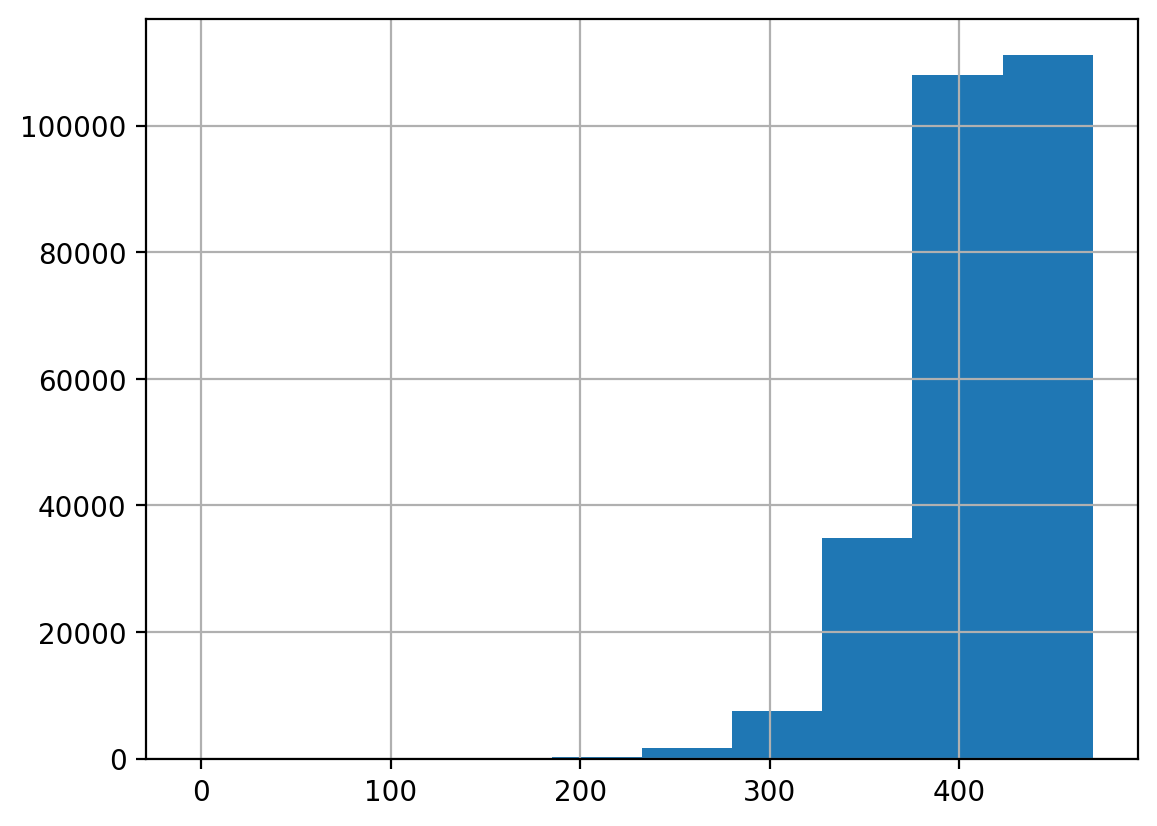

In [157]:
varp = [v for v in df.columns if v[:2]=='P_']
df['score'] = df[varp].sum(axis=1)
df['score'].hist()

In [162]:
df['score'].describe()

count    263758.000000
mean        408.690721
std          37.116597
min          -5.501401
25%         390.365911
50%         417.298008
75%         435.304123
max         470.354161
Name: score, dtype: float64

In [163]:
lst_dfs = []
for v in X.columns.tolist():    
    display(df[['W_'+v[2:],'P_'+v[2:],v[2:]]].groupby(v[2:]).max().reset_index().fillna(0))
    lst_dfs.append(df[['W_'+v[2:],'P_'+v[2:],v[2:]]].groupby(v[2:]).max().reset_index().fillna(0))

,hora,W_hora,P_hora
0,"(-0.024, 3.286]",0.117247,58.668274
1,"(13.143, 16.429]",0.658523,78.331696
2,"(16.429, 19.714]",0.044052,56.009263
3,"(19.714, 23.0]",-1.677988,-6.548783
4,"(3.286, 6.571]",0.104721,58.213246
5,"(6.571, 9.857]",0.226824,62.648996
6,"(9.857, 13.143]",0.127009,59.022919


,amount,W_amount,P_amount
0,"(-0.701, 77.778]",0.131569,60.328643
1,"(155.556, 233.333]",0.212787,63.982883
2,"(233.333, 311.111]",-0.410317,35.947569
3,"(311.111, 388.889]",-1.087545,5.477087
4,"(388.889, 466.667]",-0.351941,38.574073
5,"(466.667, 544.444]",-0.661099,24.664149
6,"(544.444, 622.222]",-0.704584,22.707625
7,"(622.222, 700.0]",-1.107350,4.585983
8,"(77.778, 155.556]",-0.322433,39.901750


,variable_04,W_variable_04,P_variable_04
0,"(-0.021, 0.682]",0.049503,56.068629
1,"(-0.724, -0.021]",0.334912,65.637574
2,"(-1.427, -0.724]",-0.232671,46.608168
3,"(-2.13, -1.427]",-1.759136,-4.569734
4,"(-2.834, -2.13]",-1.129149,16.551885
5,"(-3.544, -2.834]",-4.250963,-88.113395
6,"(0.682, 1.385]",-0.510764,37.284530
7,"(1.385, 2.088]",-2.907229,-43.061906
8,"(2.088, 2.792]",-4.293523,-89.540294


,variable_10,W_variable_10,P_variable_10
0,"(-0.417, 0.712]",0.722401,82.915211
1,"(-1.546, -0.417]",0.375989,69.245625
2,"(-2.675, -1.546]",-0.866060,20.233845
3,"(-3.804, -2.675]",-1.917607,-21.260677
4,"(-4.944, -3.804]",0.000000,0.000000
5,"(0.712, 1.841]",-0.555345,32.494793
6,"(1.841, 2.97]",-2.361257,-38.767329
7,"(2.97, 4.099]",-3.478786,-82.865531
8,"(4.099, 5.228]",-5.151750,-148.881442


,variable_14,W_variable_14,P_variable_14
0,"(-0.309, 0.739]",0.049815,55.268649
1,"(-1.356, -0.309]",0.139367,56.814131
2,"(-2.404, -1.356]",-0.423681,47.097075
3,"(-3.451, -2.404]",-1.066851,35.997282
4,"(-4.508, -3.451]",-2.641525,8.821643
5,"(0.739, 1.786]",0.038538,55.074039
6,"(1.786, 2.834]",-0.588860,44.246440
7,"(2.834, 3.881]",0.000000,0.000000


,variable_16,W_variable_16,P_variable_16
0,"(-0.792, 0.28]",0.254711,66.625868
1,"(-1.864, -0.792]",-0.256938,42.085231
2,"(-2.936, -1.864]",-0.665177,22.504515
3,"(-4.018000000000001, -2.936]",-1.362909,-10.961420
4,"(0.28, 1.352]",0.029105,55.804957
5,"(1.352, 2.425]",-0.248023,42.512817
6,"(2.425, 3.497]",0.309144,69.236693
7,"(3.497, 4.569]",0.000000,0.000000


,variable_21,W_variable_21,P_variable_21
0,"(-10.519, 20.007]",0.043436,56.046798
1,"(-41.105999999999995, -10.519]",-5.688551,-160.092808


In [164]:
df_score_card = pd.concat(lst_dfs,axis=1)
df_score_card#.to_excel('score_card2.xlsx',index=False)

,hora,W_hora,P_hora,amount,W_amount,P_amount,variable_04,W_variable_04,P_variable_04,variable_10,W_variable_10,P_variable_10,variable_14,W_variable_14,P_variable_14,variable_16,W_variable_16,P_variable_16,variable_21,W_variable_21,P_variable_21
0,"(-0.024, 3.286]",0.117247,58.668274,"(-0.701, 77.778]",0.131569,60.328643,"(-0.021, 0.682]",0.049503,56.068629,"(-0.417, 0.712]",0.722401,82.915211,"(-0.309, 0.739]",0.049815,55.268649,"(-0.792, 0.28]",0.254711,66.625868,"(-10.519, 20.007]",0.043436,56.046798
1,"(13.143, 16.429]",0.658523,78.331696,"(155.556, 233.333]",0.212787,63.982883,"(-0.724, -0.021]",0.334912,65.637574,"(-1.546, -0.417]",0.375989,69.245625,"(-1.356, -0.309]",0.139367,56.814131,"(-1.864, -0.792]",-0.256938,42.085231,"(-41.105999999999995, -10.519]",-5.688551,-160.092808
2,"(16.429, 19.714]",0.044052,56.009263,"(233.333, 311.111]",-0.410317,35.947569,"(-1.427, -0.724]",-0.232671,46.608168,"(-2.675, -1.546]",-0.866060,20.233845,"(-2.404, -1.356]",-0.423681,47.097075,"(-2.936, -1.864]",-0.665177,22.504515,NaN,NaN,NaN
3,"(19.714, 23.0]",-1.677988,-6.548783,"(311.111, 388.889]",-1.087545,5.477087,"(-2.13, -1.427]",-1.759136,-4.569734,"(-3.804, -2.675]",-1.917607,-21.260677,"(-3.451, -2.404]",-1.066851,35.997282,"(-4.018000000000001, -2.936]",-1.362909,-10.961420,NaN,NaN,NaN
4,"(3.286, 6.571]",0.104721,58.213246,"(388.889, 466.667]",-0.351941,38.574073,"(-2.834, -2.13]",-1.129149,16.551885,"(-4.944, -3.804]",0.000000,0.000000,"(-4.508, -3.451]",-2.641525,8.821643,"(0.28, 1.352]",0.029105,55.804957,NaN,NaN,NaN
5,"(6.571, 9.857]",0.226824,62.648996,"(466.667, 544.444]",-0.661099,24.664149,"(-3.544, -2.834]",-4.250963,-88.113395,"(0.712, 1.841]",-0.555345,32.494793,"(0.739, 1.786]",0.038538,55.074039,"(1.352, 2.425]",-0.248023,42.512817,NaN,NaN,NaN
6,"(9.857, 13.143]",0.127009,59.022919,"(544.444, 622.222]",-0.704584,22.707625,"(0.682, 1.385]",-0.510764,37.284530,"(1.841, 2.97]",-2.361257,-38.767329,"(1.786, 2.834]",-0.588860,44.246440,"(2.425, 3.497]",0.309144,69.236693,NaN,NaN,NaN
7,NaN,NaN,NaN,"(622.222, 700.0]",-1.107350,4.585983,"(1.385, 2.088]",-2.907229,-43.061906,"(2.97, 4.099]",-3.478786,-82.865531,"(2.834, 3.881]",0.000000,0.000000,"(3.497, 4.569]",0.000000,0.000000,NaN,NaN,NaN
8,NaN,NaN,NaN,"(77.778, 155.556]",-0.322433,39.901750,"(2.088, 2.792]",-4.293523,-89.540294,"(4.099, 5.228]",-5.151750,-148.881442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df['r_score'] = pd.cut(df['score'],bins=11,include_lowest=True).astype(str)
aux     = df[['r_score','is_fraud']].copy()
aux['n']= 1
aux = aux.pivot_table(index='r_score',columns='is_fraud',values='n',aggfunc='sum')
aux.to_excel('datasets/creditscoring/SCORE.xlsx')
aux

is_fraud,0,1
r_score,,
"(-5.978000000000001, 37.758]",NaN,4.0
"(124.277, 167.537]",33.0,11.0
"(167.537, 210.797]",142.0,22.0
"(210.797, 254.056]",665.0,30.0
"(254.056, 297.316]",2893.0,62.0
"(297.316, 340.575]",9403.0,76.0
"(340.575, 383.835]",41476.0,101.0
"(37.758, 81.018]",NaN,2.0
"(383.835, 427.095]",117719.0,121.0


In [166]:
## varnormal = [i[2:] for i in X.columns.tolist()]
varwoe    = X.columns.tolist()

varpuntos = ['P_'+i[2:] for i in X.columns.tolist()]

variables_evaluacion = varc + varwoe + varpuntos

df_scoring = df[variables_evaluacion].copy()

df_scoring

,hora,amount,variable_01,variable_02,variable_03,variable_04,variable_05,variable_06,variable_07,variable_08,variable_09,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,variable_29,variable_30,variable_31,variable_32,W_hora,W_amount,W_variable_04,W_variable_10,W_variable_14,W_variable_16,W_variable_21,P_hora,P_amount,P_variable_04,P_variable_10,P_variable_14,P_variable_16,P_variable_21
0,"(9.857, 13.143]","(-0.701, 77.778]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.24, 0.258]","(-0.021, 0.682]","(-1.312, -0.55]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(-0.309, 0.739]","(-0.671, 2.419]","(1.352, 2.425]","(-1.682, 0.747]","(-3.701, 0.241]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(-1.925, 0.315]","(-5.505, 11.095]","(-3.141, -0.598]","(-4.635, -0.224]","(-4.938, 0.461]","(-1.671, 2.455]","(-0.815, 0.877]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0.127009,0.131569,0.049503,0.722401,0.049815,-0.248023,0.043436,59.022919,60.328643,56.068629,82.915211,55.268649,42.512817,56.046798
1,"(3.286, 6.571]","(155.556, 233.333]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.24, 0.258]","(-0.021, 0.682]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(0.739, 1.786]","(-0.671, 2.419]","(-0.792, 0.28]","(-1.682, 0.747]","(-3.701, 0.241]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(-1.925, 0.315]","(-5.505, 11.095]","(-3.141, -0.598]","(-0.224, 4.188]","(-4.938, 0.461]","(-1.671, 2.455]","(-0.815, 0.877]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0.104721,0.212787,0.049503,0.722401,0.038538,0.254711,0.043436,58.213246,63.982883,56.068629,82.915211,55.074039,66.625868,56.046798
2,"(13.143, 16.429]","(-0.701, 77.778]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.24, 0.258]","(-0.021, 0.682]","(-1.312, -0.55]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(0.739, 1.786]","(-3.762, -0.671]","(-0.792, 0.28]","(-1.682, 0.747]","(-3.701, 0.241]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(-1.925, 0.315]","(-5.505, 11.095]","(-0.598, 1.944]","(-4.635, -0.224]","(0.461, 5.86]","(-1.671, 2.455]","(-0.815, 0.877]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0.658523,0.131569,0.049503,0.722401,0.038538,0.254711,0.043436,78.331696,60.328643,56.068629,82.915211,55.074039,66.625868,56.046798
3,"(13.143, 16.429]","(-0.701, 77.778]","(-0.318, 0.381]","(-0.617, 0.491]","(-0.737, -0.24]","(-0.724, -0.021]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(0.712, 1.841]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(-1.356, -0.309]","(-3.762, -0.671]","(-0.792, 0.28]","(-1.682, 0.747]","(0.241, 4.167]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.032]","(-1.925, 0.315]","(-5.505, 11.095]","(-3.141, -0.598]","(-4.635, -0.224]","(-4.938, 0.461]","(-1.671, 2.455]","(-2.506, -0.815]","(-6.985, 7.224]","(-4.197, 5.031]","(-1.974, 1.571]",0.658523,0.131569,0.334912,-0.555345,0.139367,0.254711,0.043436,78.331696,60.328643,65.637574,32.494793,56.814131,66.625868,56.046798
4,"(9.857, 13.143]","(-0.701, 77.778]","(-0.318, 0.381]","(-0.617, 0.491]","(0.258, 0.755]","(-0.724, -0.021]","(0.212, 0.974]","(-0.551, 2.535]","(-3.137, 2.612]","(-0.575, 4.98]","(-1.822, 0.754]","(-0.417, 0.712]","(-2.602, 4.296]","(-2.219, 3.517]","(-4.657, 4.816]","(-0.309, 0.739]","(-0.671, 2.419]","(-1.864, -0.792]","(-1.682, 0.747]","(0.241, 4.167]","(-2.242, 8.931]","(-3.173, 7.088]","(-10.519, 20.007]","(-2.767, 4.0